# Predicting Loan defaulting using machine learning

## Data gathering and cleaning

#### Header files

In [1]:
import numpy as arr  #used for arrays
import pandas as st #used for collection of data in a structured form
import seaborn as dv #data visualization
from sklearn.model_selection import train_test_split #tools for selection and train 
from sklearn import svm   #import support vector machine model
from sklearn.metrics import accuracy_score


#### Importing dataset

In [2]:
#importing of dataset
mydataset = st.read_csv('Data Group 1.csv')

In [3]:
st.set_option('display.max_rows', None)
print(mydataset)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
5    LP001011    Male     Yes          2      Graduate           Yes   
6    LP001013    Male     Yes          0  Not Graduate            No   
7    LP001014    Male     Yes         3+      Graduate            No   
8    LP001018    Male     Yes          2      Graduate            No   
9    LP001020    Male     Yes          1      Graduate            No   
10   LP001024    Male     Yes          2      Graduate            No   
11   LP001027    Male     Yes          2      Graduate           NaN   
12   LP001028    Male     Yes          2      Graduate          

#### . Descriptive analysis

In [4]:
# display statistical measures
mydataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,513.000000,513.000000,495.000000,499.000000,470.000000
mean,5497.013645,1537.364366,144.739394,343.118236,0.846809
std,6486.147388,2144.079038,83.200278,63.375911,0.360556
min,150.000000,0.000000,17.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3846.000000,1210.000000,127.000000,360.000000,1.000000
75%,5746.000000,2283.000000,163.000000,360.000000,1.000000
max,81000.000000,20000.000000,700.000000,480.000000,1.000000


In [5]:
# display total number of rows and columns
mydataset.shape

(513, 13)

#### Missing values and Feature tuning

In [6]:
#check number of missing values
mydataset.isnull().sum()

Loan_ID               0
Gender               10
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#Dependent column values, fix errors in these column
mydataset['Dependents'].value_counts()

0     295
1      84
2      82
3+     40
Name: Dependents, dtype: int64

In [8]:
#fixing this error by replacing 3+ with 4
mydataset = mydataset.replace(to_replace='3+', value=4)


In [9]:
#Dependent column values, checking if the errors were fixed
mydataset['Dependents'].value_counts()

0    295
1     84
2     82
4     40
Name: Dependents, dtype: int64

In [10]:
#LoanAmount column values, to check errors in these column
mydataset['LoanAmount'].value_counts()

120.0    19
100.0    13
160.0    12
110.0    12
113.0    10
128.0     9
187.0     9
96.0      9
130.0     9
115.0     8
112.0     8
135.0     7
95.0      7
136.0     6
116.0     6
144.0     6
175.0     6
125.0     6
138.0     6
81.0      6
111.0     5
180.0     5
132.0     5
152.0     5
158.0     5
80.0      5
70.0      5
90.0      5
124.0     5
200.0     5
150.0     5
104.0     5
185.0     4
50.0      4
71.0      4
140.0     4
60.0      4
131.0     4
137.0     4
133.0     4
151.0     4
134.0     4
122.0     4
155.0     4
105.0     4
98.0      4
118.0     3
170.0     3
127.0     3
93.0      3
225.0     3
55.0      3
188.0     3
182.0     3
84.0      3
67.0      3
66.0      3
255.0     3
75.0      3
88.0      3
126.0     3
99.0      3
168.0     3
74.0      3
87.0      2
108.0     2
30.0      2
184.0     2
162.0     2
275.0     2
121.0     2
148.0     2
201.0     2
102.0     2
103.0     2
76.0      2
114.0     2
109.0     2
123.0     2
173.0     2
141.0     2
480.0     2
129.0     2
143.

In [11]:
#Loan_Amount_Term column values, to check errors in these column
mydataset['Loan_Amount_Term'].value_counts()

360.0    426
180.0     35
300.0     13
480.0     13
120.0      3
240.0      3
60.0       2
84.0       2
36.0       1
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [12]:
#Credit_History column values, to check errors in these column
mydataset['Credit_History'].value_counts()

1.0    398
0.0     72
Name: Credit_History, dtype: int64

In [13]:
#Fixing numerical missing values
mydataset['LoanAmount']=mydataset['LoanAmount'].fillna(mydataset['LoanAmount'].mean())


In [14]:
mydataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,513.000000,513.000000,513.000000,499.000000,470.000000
mean,5497.013645,1537.364366,144.739394,343.118236,0.846809
std,6486.147388,2144.079038,81.724688,63.375911,0.360556
min,150.000000,0.000000,17.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3846.000000,1210.000000,128.000000,360.000000,1.000000
75%,5746.000000,2283.000000,160.000000,360.000000,1.000000
max,81000.000000,20000.000000,700.000000,480.000000,1.000000


In [15]:
#Fixing numerical missing values
mydataset['Loan_Amount_Term']=mydataset['Loan_Amount_Term'].fillna(mydataset['Loan_Amount_Term'].mean())

In [16]:
#Fixing numerical missing values
mydataset['Credit_History']=mydataset['Credit_History'].fillna(mydataset['Credit_History'].mean())

In [17]:
mydataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,513.000000,513.000000,513.000000,513.000000,513.000000
mean,5497.013645,1537.364366,144.739394,343.118236,0.846809
std,6486.147388,2144.079038,81.724688,62.503438,0.345083
min,150.000000,0.000000,17.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3846.000000,1210.000000,128.000000,360.000000,1.000000
75%,5746.000000,2283.000000,160.000000,360.000000,1.000000
max,81000.000000,20000.000000,700.000000,480.000000,1.000000


In [18]:
mydataset['Gender'].mode()[0]

'Male'

In [19]:
#Fixing categorial missing values
mydataset['Gender']=mydataset['Gender'].fillna(mydataset['Gender'].mode()[0])
mydataset['Dependents']=mydataset['Dependents'].fillna(mydataset['Dependents'].mode()[0])
mydataset['Married']=mydataset['Married'].fillna(mydataset['Married'].mode()[0])
mydataset['Self_Employed']=mydataset['Self_Employed'].fillna(mydataset['Self_Employed'].mode()[0])

In [20]:
#check number of missing values
mydataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Exploratory Data Analysis

Data visualization for categorial values

c:\Users\Lebalang Letse'la\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

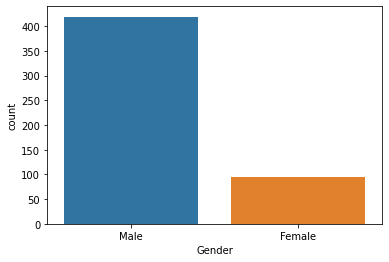

In [21]:
dv.countplot(mydataset['Gender'])

c:\Users\Lebalang Letse'la\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

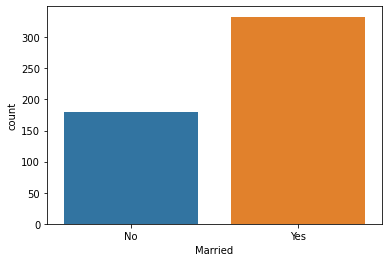

In [22]:
dv.countplot(mydataset['Married'])

c:\Users\Lebalang Letse'la\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

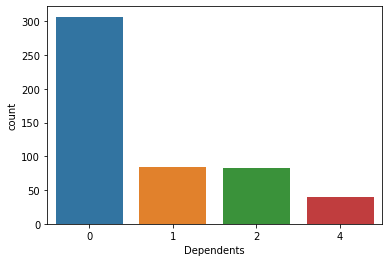

In [23]:
dv.countplot(mydataset['Dependents'])

c:\Users\Lebalang Letse'la\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

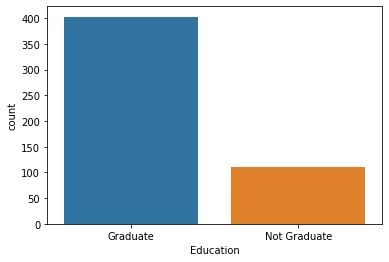

In [24]:
dv.countplot(mydataset['Education'])

c:\Users\Lebalang Letse'la\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

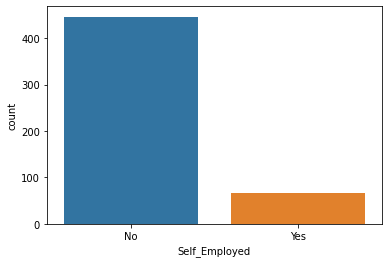

In [25]:
dv.countplot(mydataset['Self_Employed'])

In [26]:
# create new column
mydataset['Total_income'] = mydataset['ApplicantIncome']+mydataset['CoapplicantIncome']

In [27]:
mydataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,144.739394,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


Data transformation for normal distribution

c:\Users\Lebalang Letse'la\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

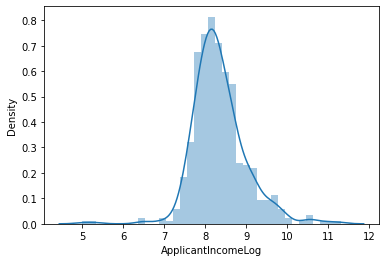

In [28]:
mydataset['ApplicantIncomeLog'] = arr.log(mydataset['ApplicantIncome'])
dv.distplot(mydataset.ApplicantIncomeLog)

c:\Users\Lebalang Letse'la\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Lebalang Letse'la\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

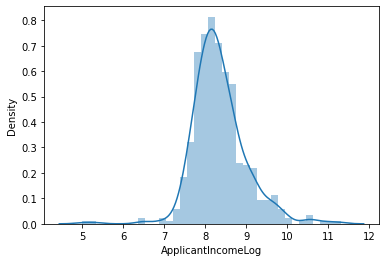

In [29]:
mydataset['CoapplicantIncomeLog'] = arr.log(mydataset['CoapplicantIncome'])
dv.distplot(mydataset["ApplicantIncomeLog"])

c:\Users\Lebalang Letse'la\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

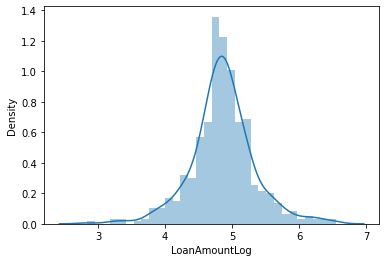

In [30]:
mydataset['LoanAmountLog'] = arr.log(mydataset['LoanAmount'])
dv.distplot(mydataset["LoanAmountLog"])

c:\Users\Lebalang Letse'la\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term_Log', ylabel='Density'>

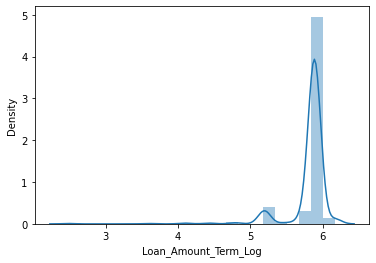

In [31]:
mydataset['Loan_Amount_Term_Log'] = arr.log(mydataset['Loan_Amount_Term'])
dv.distplot(mydataset["Loan_Amount_Term_Log"])

c:\Users\Lebalang Letse'la\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Income_Log', ylabel='Density'>

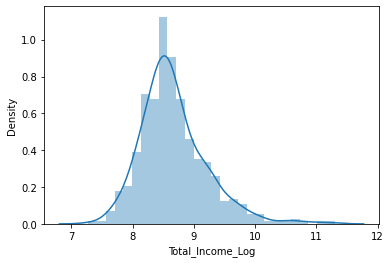

In [32]:
mydataset['Total_Income_Log'] = arr.log(mydataset['Total_income'])
dv.distplot(mydataset["Total_Income_Log"])

In [33]:
mydataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,144.739394,360.0,1.0,Urban,Y,5849.0,8.674026,-inf,4.974935,5.886104,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,7.318540,4.852030,5.886104,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,-inf,4.189655,5.886104,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,7.765569,4.787492,5.886104,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,-inf,4.948760,5.886104,8.699515


In [34]:
# droping unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_income", 'Loan_ID', 'CoapplicantIncomeLog']
mydataset = mydataset.drop(columns=cols, axis=1)

In [35]:
mydataset.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.974935,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,8.699515


In [36]:
mydataset.Loan_Status.value_counts()

Y    355
N    158
Name: Loan_Status, dtype: int64

In [37]:
mydataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                513 non-null    object 
 1   Married               513 non-null    object 
 2   Dependents            513 non-null    object 
 3   Education             513 non-null    object 
 4   Self_Employed         513 non-null    object 
 5   Credit_History        513 non-null    float64
 6   Property_Area         513 non-null    object 
 7   Loan_Status           513 non-null    object 
 8   ApplicantIncomeLog    513 non-null    float64
 9   LoanAmountLog         513 non-null    float64
 10  Loan_Amount_Term_Log  513 non-null    float64
 11  Total_Income_Log      513 non-null    float64
dtypes: float64(5), object(7)
memory usage: 48.2+ KB


## Outliers and data preprocessing

#### Feature extraction

In [38]:
#Encoding "categorial to numerical"
mydataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [39]:
#convert categorical columns to numerical values
mydataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                   'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [40]:
mydataset.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,1,0,1.0,2,1,8.674026,4.974935,5.886104,8.674026
1,1,1,1,1,0,1.0,0,0,8.430109,4.852030,5.886104,8.714568
2,1,1,0,1,1,1.0,2,1,8.006368,4.189655,5.886104,8.006368
3,1,1,0,0,0,1.0,2,1,7.856707,4.787492,5.886104,8.505323
4,1,0,0,1,0,1.0,2,1,8.699515,4.948760,5.886104,8.699515


#### print last 5 rows of dataset

In [41]:
mydataset.tail()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
508,1,1,0,1,1,1.0,2,1,7.815611,5.236442,5.886104,8.611048
509,0,0,1,1,0,1.0,2,1,9.492658,3.688879,5.886104,9.492658
510,1,0,0,0,0,1.0,0,0,8.188133,4.605170,5.886104,8.493925
511,1,1,1,1,0,1.0,1,1,8.710290,5.521461,5.886104,8.995785
512,1,1,2,1,0,1.0,2,1,8.096513,4.997212,5.886104,8.578853


#### Dealing with outliers

In [42]:
import matplotlib.pyplot as plt
#outliers using box plot
def plot_boxplot(bp, ft):
    bp.boxplot(column=[ft])
    plt.grid(False)
    plt.show()


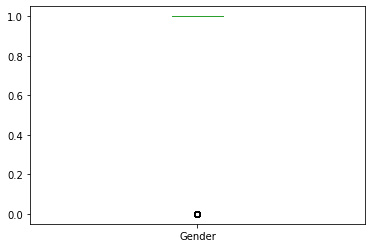

In [43]:
plot_boxplot(mydataset,"Gender")

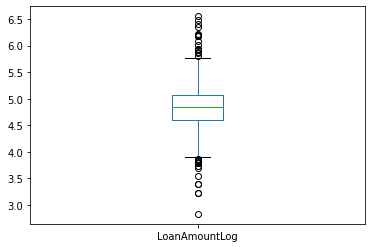

In [44]:
plot_boxplot(mydataset,"LoanAmountLog")

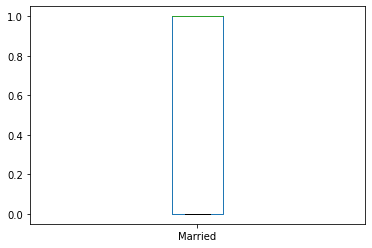

In [45]:
plot_boxplot(mydataset,"Married")

In [46]:
#converting Dependents values to numerical form
mydataset.replace({"Dependents":{'0':0,'1':1,'2':2,'4':4}},inplace=True)

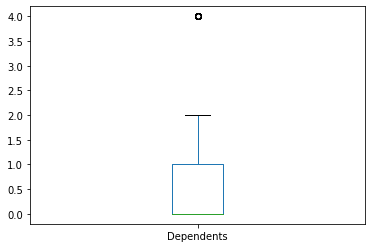

In [47]:
plot_boxplot(mydataset,"Dependents")

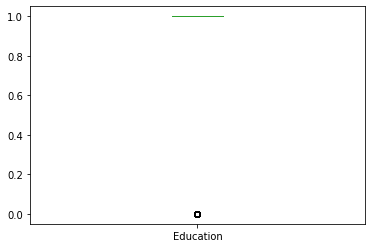

In [48]:
plot_boxplot(mydataset,"Education")

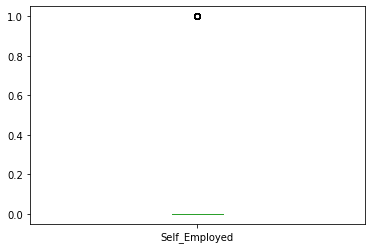

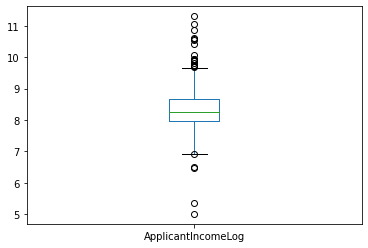

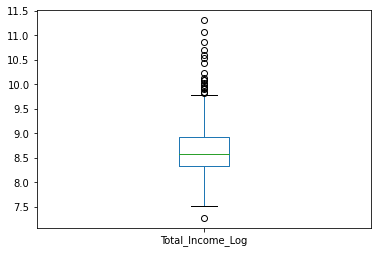

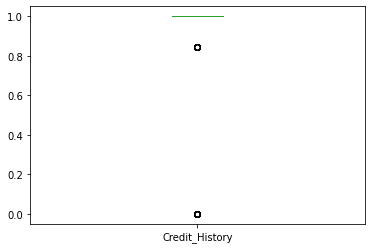

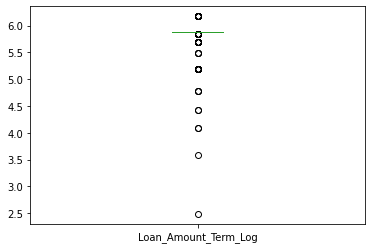

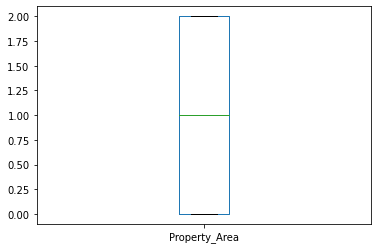

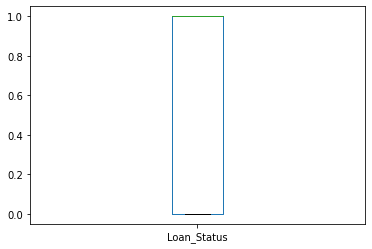

In [49]:
plot_boxplot(mydataset,"Self_Employed")
plot_boxplot(mydataset,"ApplicantIncomeLog")
plot_boxplot(mydataset,"Total_Income_Log")
plot_boxplot(mydataset,"Credit_History")
plot_boxplot(mydataset,"Loan_Amount_Term_Log")
plot_boxplot(mydataset,"Property_Area")
plot_boxplot(mydataset,"Loan_Status")

In [50]:
#declare the function for outliers
def detect_outliers(bp, ft):
    Q1 = bp[ft].quantile(0.05)
    Q3 = bp[ft].quantile(0.95)
    IQR = Q3 - Q1
    
    lower_limits = Q1 - 1.5*IQR
    upper_limits = Q3 + 1.5*IQR
    
    list_array = bp.index[ (bp[ft] < lower_limits) | (bp[ft] > upper_limits) ]
    
    return list_array
    

In [51]:
#storing the outliers
array_list = []
for dataset in ['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncomeLog','Total_Income_Log','LoanAmountLog','Loan_Amount_Term_Log','Credit_History','Property_Area','Loan_Status']:
    array_list.extend(detect_outliers(mydataset, dataset))


In [52]:
#show outliers
array_list

[68, 242, 262, 497]

In [53]:
#deleting the outliers
def delete(bp, list_array):
    list_array = sorted(set(list_array))
    bp = bp.drop(list_array)
    return bp

In [54]:
#fuction to clean dataset
bp_clean = delete(mydataset, array_list)

In [55]:
#display rows and columns after cleaning or removing outliers
bp_clean.shape

(509, 12)

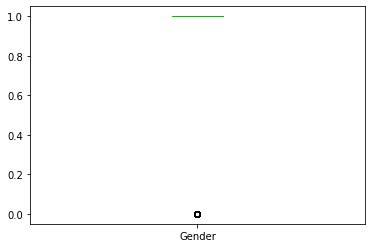

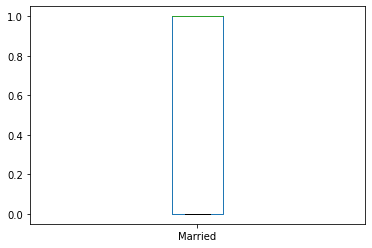

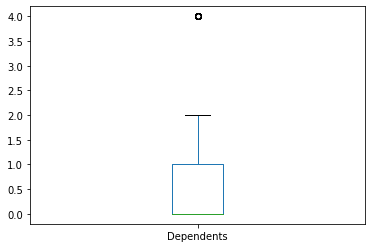

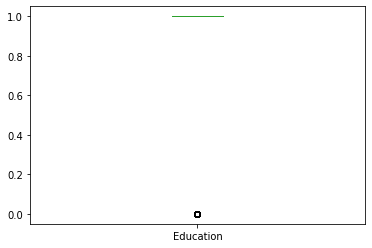

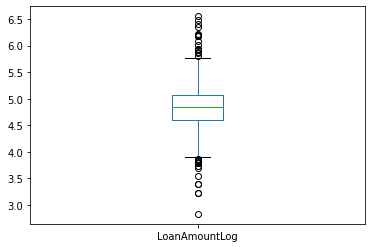

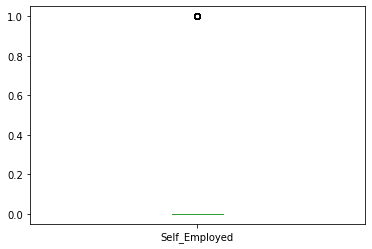

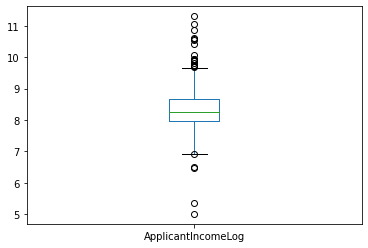

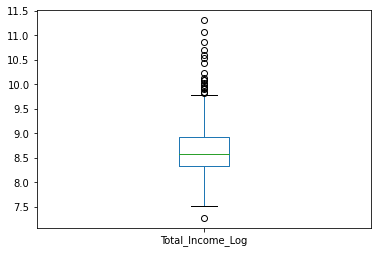

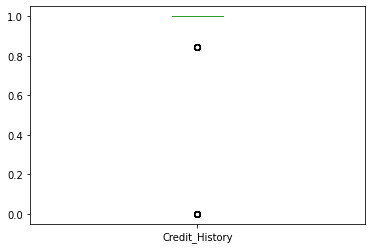

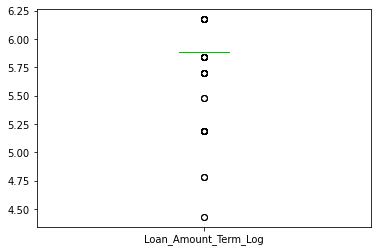

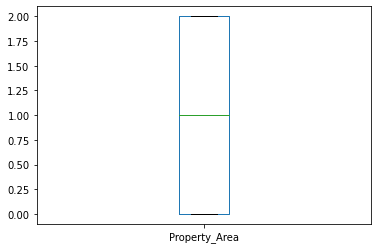

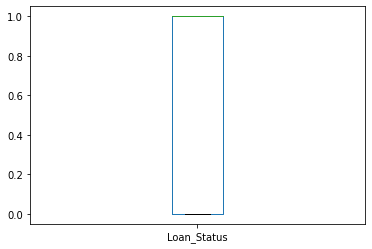

In [56]:
plot_boxplot(bp_clean,"Gender")
plot_boxplot(bp_clean,"Married")
plot_boxplot(bp_clean,"Dependents")
plot_boxplot(bp_clean,"Education")
plot_boxplot(bp_clean,"LoanAmountLog")
plot_boxplot(bp_clean,"Self_Employed")
plot_boxplot(bp_clean,"ApplicantIncomeLog")
plot_boxplot(bp_clean,"Total_Income_Log")
plot_boxplot(bp_clean,"Credit_History")
plot_boxplot(bp_clean,"Loan_Amount_Term_Log")
plot_boxplot(bp_clean,"Property_Area")
plot_boxplot(bp_clean,"Loan_Status")

In [57]:
bp_clean.describe()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,0.817289,0.650295,0.791749,0.785855,0.129666,0.845906,1.055010,0.691552,8.346660,4.857716,5.825228,8.667816
std,0.386810,0.477346,1.187140,0.410632,0.336266,0.346238,0.789273,0.462307,0.656058,0.476724,0.221038,0.547735
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.010635,2.833213,4.430817,7.273786
25%,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,7.963808,4.605170,5.886104,8.339979
50%,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,8.254789,4.852030,5.886104,8.581482
75%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,8.656259,5.075174,5.886104,8.928243
max,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,11.302204,6.551080,6.173786,11.302204


## Model Training, Test, Tuning and Model Determination

In [58]:
# specify input & output variables
x = mydataset.drop(columns=['Loan_Status'], axis=1)
y =  mydataset['Loan_Status']

In [59]:
print(x)

     Gender  Married  Dependents  Education  Self_Employed  Credit_History  \
0         1        0           0          1              0        1.000000   
1         1        1           1          1              0        1.000000   
2         1        1           0          1              1        1.000000   
3         1        1           0          0              0        1.000000   
4         1        0           0          1              0        1.000000   
5         1        1           2          1              1        1.000000   
6         1        1           0          0              0        1.000000   
7         1        1           4          1              0        0.000000   
8         1        1           2          1              0        1.000000   
9         1        1           1          1              0        1.000000   
10        1        1           2          1              0        1.000000   
11        1        1           2          1              0      

In [60]:
print(y)

0      1
1      0
2      1
3      1
4      1
5      1
6      1
7      0
8      1
9      0
10     1
11     1
12     1
13     0
14     1
15     1
16     1
17     0
18     0
19     1
20     0
21     1
22     0
23     0
24     0
25     1
26     1
27     1
28     0
29     1
30     0
31     0
32     0
33     1
34     0
35     1
36     0
37     1
38     1
39     1
40     0
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     0
49     1
50     1
51     1
52     0
53     0
54     0
55     1
56     1
57     0
58     1
59     1
60     1
61     1
62     0
63     0
64     0
65     0
66     0
67     1
68     1
69     0
70     1
71     1
72     1
73     0
74     1
75     0
76     0
77     0
78     0
79     1
80     1
81     1
82     0
83     0
84     1
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     0
96     1
97     1
98     1
99     1
100    1
101    1
102    1
103    1
104    1
105    1
106    1
107    0
108    0
109    1
110    1
1

In [61]:
# splitting dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=42)

In [62]:
#model training

#model classify function
from sklearn.model_selection import cross_val_score

def classification(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
    
    model.fit(x_train, y_train)
    
    #printing accuracy score for model 
    print("Your accuracy score is", model.score(x_test, y_test)*100)
    
    #use cross validation to allow usage of same dataset to different models
    score = cross_val_score(model, x, y, cv=4)
    print("cross validation is", arr.mean(score)*100)

In [63]:
#fitting data to our chosen models
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classification(model, x,y)

Your accuracy score is 76.92307692307693
cross validation is 80.89722625968993


c:\Users\Lebalang Letse'la\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred
    
 #confusion matrix
conf = confusion_matrix(y_test, y_pred)
print( "confusion matrix", conf)

confusion matrix [[ 6 11]
 [ 1 34]]


In [65]:
#fitting data to our chosen models
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classification(model, x,y)

Your accuracy score is 69.23076923076923
cross validation is 69.19361676356588


In [66]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred
    
 #confusion matrix
conf = confusion_matrix(y_test, y_pred)
print( "confusion matrix", conf)

confusion matrix [[ 7 10]
 [ 6 29]]


In [67]:
#fitting data to our chosen models
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classification(model, x,y)

Your accuracy score is 71.15384615384616
cross validation is 78.36119186046511


In [68]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred
    
 #confusion matrix
conf = confusion_matrix(y_test, y_pred)
print( "confusion matrix", conf)

confusion matrix [[ 6 11]
 [ 4 31]]


In [69]:
#fitting data to our chosen models
model = svm.SVC(kernel='linear')
classification(model, x,y)    

Your accuracy score is 76.92307692307693
cross validation is 80.89571220930233


In [70]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred
    
 #confusion matrix
conf = confusion_matrix(y_test, y_pred)
print( "confusion matrix", conf)

confusion matrix [[ 6 11]
 [ 1 34]]


In [71]:
import pickle
file=open("model.pkl", 'wb')
pickle.dump(model, file)